In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('problem_1/train.csv')

In [3]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1


In [4]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [5]:
#target variable Dateset
data['Dataset'].unique()

array([1, 2], dtype=int64)

In [6]:
#it is binary classification

In [7]:
#code to check if nan is present or not in dataset

In [8]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    3
Dataset                       0
dtype: int64

In [9]:
#Albumin_and_Globulin_Ratio    3 contains nans

In [10]:
mean_al_and_glo=data['Albumin_and_Globulin_Ratio'].mean()

In [11]:
mean_al_and_glo

0.9541036717062635

In [12]:
data['Albumin_and_Globulin_Ratio'].fillna(mean_al_and_glo,inplace=True)

In [13]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [14]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [15]:
#giving numerical values to categorical values male=1 and female=1

In [16]:
def numeric(gender):
    if gender=='Male':
        value=1
    else:
        value=0
    return value

In [17]:
data['Gender']=data['Gender'].apply(numeric)

In [18]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,1,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,0,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,1,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,1,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,1


In [19]:
grp=data.groupby('Dataset')

In [20]:
df=grp.get_group(1)

In [21]:
df['Gender'].value_counts()

1    262
0     71
Name: Gender, dtype: int64

In [22]:
#for Dataset=1 there more male

In [23]:
df1=grp.get_group(2)

In [24]:
df1['Gender'].value_counts()

1    99
0    34
Name: Gender, dtype: int64

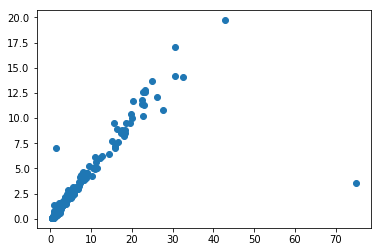

In [25]:
x=data['Total_Bilirubin']
y=data['Direct_Bilirubin']
plt.scatter(x,y)

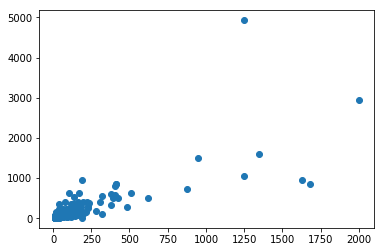

In [26]:
x=data['Alamine_Aminotransferase']
y=data['Aspartate_Aminotransferase']
plt.scatter(x,y)

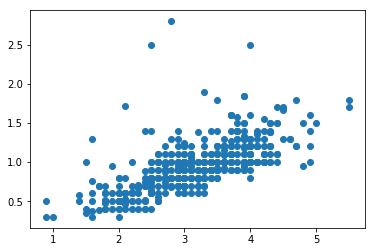

In [27]:
x=data['Albumin']
y=data['Albumin_and_Globulin_Ratio']
plt.scatter(x,y)

In [28]:
feature_cols=['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase' ,'Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']

X=data[feature_cols]
y=data.Dataset

# Logistics Regression

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state = 2) 

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logisticRegr = LogisticRegression()

In [32]:
logisticRegr.fit(X_train, y_train)

C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
y_pred=logisticRegr.predict(X_test)

In [34]:
score = logisticRegr.score(X_test, y_test)

In [35]:
score

0.6642857142857143

In [36]:
feature_cols=['Age','Gender','Direct_Bilirubin','Alkaline_Phosphotase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']

X=data[feature_cols]
y=data.Dataset

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 2)
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_pred=logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)                      

C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
score

0.6666666666666666

# SVM

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state = 2)

In [118]:
# feature_cols=['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase' ,'Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']
feature_cols=['Total_Bilirubin','Alkaline_Phosphotase','Direct_Bilirubin','Albumin','Alamine_Aminotransferase','Total_Protiens','Aspartate_Aminotransferase','Albumin_and_Globulin_Ratio']
X=data[feature_cols]
y=data.Dataset

In [119]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [120]:
y_pred = clf.predict(X_test)

In [121]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7872340425531915


# KNN

In [115]:
#feature_cols=['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase' ,'Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']
feature_cols=['Total_Bilirubin','Alkaline_Phosphotase','Direct_Bilirubin','Albumin','Alamine_Aminotransferase','Total_Protiens','Aspartate_Aminotransferase','Albumin_and_Globulin_Ratio']
X=data[feature_cols]
y=data.Dataset

In [116]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=20)

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
y_pred= model.predict(X_test) # 0:Overcast, 2:Mild
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7659574468085106


# Decision Tree

In [98]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [107]:
feature_cols=['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alamine_Aminotransferase','Alkaline_Phosphotase' ,'Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']
#feature_cols=['Total_Bilirubin','Alkaline_Phosphotase','Direct_Bilirubin','Albumin','Alamine_Aminotransferase','Total_Protiens','Aspartate_Aminotransferase','Albumin_and_Globulin_Ratio']
X=data[feature_cols]
y=data.Dataset

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 70% training and 30% test

In [101]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [102]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [103]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6276595744680851


In [104]:
# ['Total_Bilirubin','Alkaline_Phosphotase','Direct_Bilirubin','Albumin','Alamine_Aminotransferase',              'Total_Protiens','Aspartate_Aminotransferase','Albumin_and_Globulin_Ratio']

# Random Forest

In [109]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [110]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7021276595744681


In [122]:
#conclusion svm is performing best with features
#feature_cols=['Total_Bilirubin','Alkaline_Phosphotase','Direct_Bilirubin','Albumin','Alamine_Aminotransferase','Total_Protiens','Aspartate_Aminotransferase','Albumin_and_Globulin_Ratio']

In [123]:
feature_cols=['Total_Bilirubin','Alkaline_Phosphotase','Direct_Bilirubin','Albumin','Alamine_Aminotransferase','Total_Protiens','Aspartate_Aminotransferase','Albumin_and_Globulin_Ratio']
X=data[feature_cols]
y=data.Dataset

In [124]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [125]:
#y_pred = clf.predict(X_test)

In [126]:
data_test=pd.read_csv('problem_1/test.csv')

In [141]:
data_test.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,46,Male,0.8,0.2,160,31,40,7.3,3.8,1.10
1,15,Male,0.8,0.2,380,25,66,6.1,3.7,1.50
2,66,Female,4.2,2.1,159,15,30,7.1,2.2,0.40
3,32,Male,0.6,0.1,237,45,31,7.5,4.3,1.34
4,60,Male,2.6,1.2,171,42,37,5.4,2.7,1.00


In [149]:
len(data_test)

117

In [152]:
data_test.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    1
dtype: int64

In [154]:
data_test['Albumin_and_Globulin_Ratio'].fillna(data_test['Albumin_and_Globulin_Ratio'].mean(),inplace=True)

In [155]:
X_test=data_test[feature_cols]

In [156]:
y_pred = clf.predict(X_test)

In [157]:
data_test['Dataset']=y_pred

In [160]:
len(y_pred)

117

In [161]:
data_test.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,46,Male,0.8,0.2,160,31,40,7.3,3.8,1.10,1
1,15,Male,0.8,0.2,380,25,66,6.1,3.7,1.50,1
2,66,Female,4.2,2.1,159,15,30,7.1,2.2,0.40,1
3,32,Male,0.6,0.1,237,45,31,7.5,4.3,1.34,1
4,60,Male,2.6,1.2,171,42,37,5.4,2.7,1.00,1


In [162]:
data_test.to_csv('problem1_test_data.csv', sep=',')

In [163]:
d1=pd.read_csv('problem1_test_data.csv')

In [164]:
d1.head()

,Unnamed: 0,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0,46,Male,0.8,0.2,160,31,40,7.3,3.8,1.10,1
1,1,15,Male,0.8,0.2,380,25,66,6.1,3.7,1.50,1
2,2,66,Female,4.2,2.1,159,15,30,7.1,2.2,0.40,1
3,3,32,Male,0.6,0.1,237,45,31,7.5,4.3,1.34,1
4,4,60,Male,2.6,1.2,171,42,37,5.4,2.7,1.00,1
